In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1f5a12bb048>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [10]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [11]:
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
# Calculate the date 1 year ago from the last data point in the database
session.query(func.max(Measurement.date)).all()

date = dt.datetime(2017, 8, 23)
year_ago = date - dt.timedelta(days=365)
# print(year_ago)

In [31]:
# session.query(Measurement.date).\
#     filter(Measurement.date > year_ago).\
#     order_by(Measurement.date).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, 
       Measurement.prcp]
results = session.query(*sel).\
    filter(Measurement.date > year_ago).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
print(results)

[('2016-08-24', 1.45), ('2016-08-25', 0.11), ('2016-08-26', 0.01), ('2016-08-27', None), ('2016-08-28', 2.07), ('2016-08-29', 0.9), ('2016-08-30', 0.05), ('2016-08-31', 2.46), ('2016-09-01', 0.01), ('2016-09-02', 0.03), ('2016-09-03', 1.0), ('2016-09-04', 0.44), ('2016-09-05', 0.18), ('2016-09-06', 1.0), ('2016-09-07', 1.35), ('2016-09-08', 0.15), ('2016-09-09', 0.35), ('2016-09-10', 1.16), ('2016-09-11', 0.6), ('2016-09-12', 1.04), ('2016-09-13', 1.2), ('2016-09-14', 6.7), ('2016-09-15', 3.35), ('2016-09-16', 0.61), ('2016-09-17', 0.23), ('2016-09-18', 0.42), ('2016-09-19', 0.25), ('2016-09-20', 0.43), ('2016-09-21', 1.02), ('2016-09-22', 0.75), ('2016-09-23', 0.33), ('2016-09-24', 0.27), ('2016-09-25', 0.04), ('2016-09-26', 1.02), ('2016-09-27', 1.0), ('2016-09-28', 0.05), ('2016-09-29', 1.49), ('2016-09-30', 0.38), ('2016-10-01', 1.02), ('2016-10-02', 0.61), ('2016-10-03', 0.46), ('2016-10-04', 3.46), ('2016-10-05', 0.81), ('2016-10-06', 0.04), ('2016-10-07', 0.01), ('2016-10-08', 0

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date = [] 
prcp = []

for result in results:
    date.append(result[0]) 
    prcp.append(result[1])

print(prcp)

[1.45, 0.11, 0.01, None, 2.07, 0.9, 0.05, 2.46, 0.01, 0.03, 1.0, 0.44, 0.18, 1.0, 1.35, 0.15, 0.35, 1.16, 0.6, 1.04, 1.2, 6.7, 3.35, 0.61, 0.23, 0.42, 0.25, 0.43, 1.02, 0.75, 0.33, 0.27, 0.04, 1.02, 1.0, 0.05, 1.49, 0.38, 1.02, 0.61, 0.46, 3.46, 0.81, 0.04, 0.01, 0.04, 0.0, 0.0, 0.35, 0.02, 0.06, 0.0, 0.33, 0.0, 0.38, 0.48, 0.0, 1.0, 0.09, 1.37, 0.24, 0.7, 0.4, 0.0, 1.25, 0.37, 0.25, 0.95, 1.35, 0.09, 0.04, 0.02, 0.06, 0.38, 0.05, 0.05, 0.53, 0.04, 0.01, 0.0, 0.0, 0.0, 0.02, 0.05, 0.91, 0.02, 0.0, 0.11, None, 2.87, 2.11, 0.22, 0.72, 1.03, 0.3, 0.29, 0.69, 0.2, 0.79, 0.72, 1.27, 1.62, 0.31, 1.6, 0.0, 0.02, 0.03, 0.42, 0.04, 0.13, 0.01, 0.09, 0.33, 0.03, 0.0, 0.07, None, 0.15, 0.0, 0.55, 1.24, 0.83, 1.08, 0.38, 1.48, 0.14, 0.14, 1.03, 2.37, 0.9, 0.03, 0.0, 0.0, 0.0, 0.47, 0.1, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.07, 0.0, 0.0, 0.08, 0.72, 0.85, 1.85, 2.64, 0.1, 0.03, 0.0, 0.55, 0.0, 0.0, 0.0, 0.0, 0.0, None, 0.0, 0.0, 1.79, 0.0, 0.0, 0.0, 0.73, 1.83, 0.0, 0.01, 0.07

In [24]:
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.head()

,precipitation
date,
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN
2016-08-28,2.07


In [23]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)
df.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar(figsize=(180,180))
plt.grid()
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,344.000000
mean,0.431308
std,0.705240
min,0.000000
25%,0.010000
50%,0.140000
75%,0.565000
max,6.700000


![describe](Images/describe.png)

In [33]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [50]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sel = [Measurement.station, 
       func.count(Measurement.station)]
results = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(results)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [7]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
station = 'USC00519281'

sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

results = session.query(*sel).\
    filter(Measurement.station==station).all()
print(results)

NameError: name 'func' is not defined

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


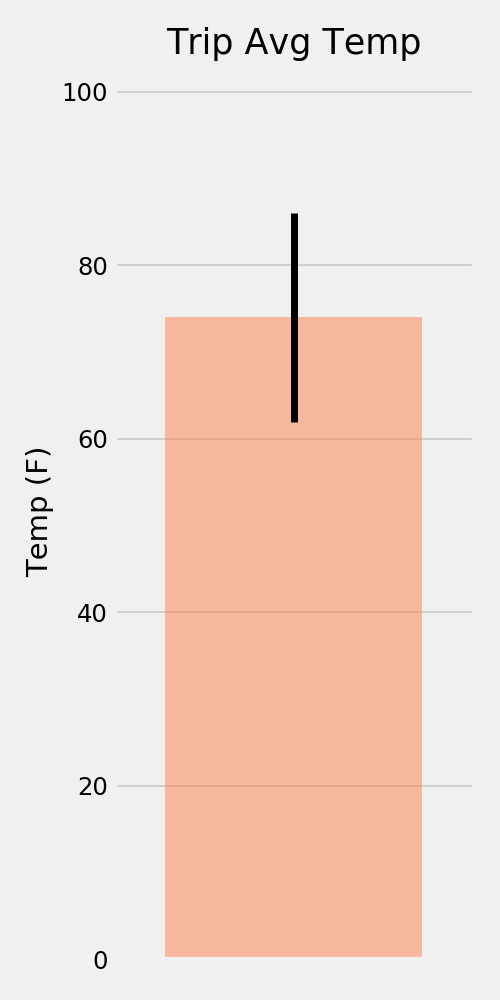

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


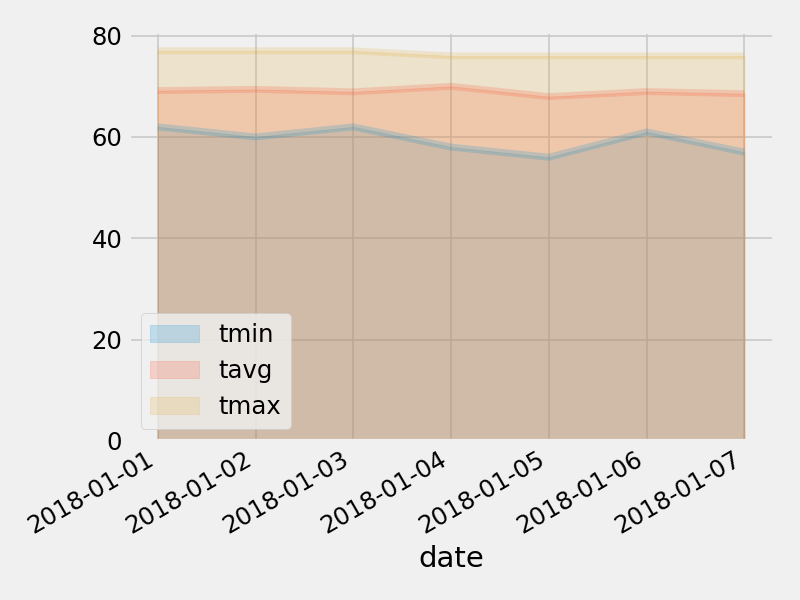

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
